In [13]:
import time
startTime = time.time()
import numpy as np
import pandas as pd
import sklearn
from pandas import DataFrame
import seaborn as sn
import seaborn as sns
import pylab as plt

In [2]:
d1 = pd.read_csv("diabetic_data.csv", delim_whitespace = False)
d2 = pd.read_csv("IDs_mapping.csv", delim_whitespace = False)
df1 = d1
df2 = d2

#### Variable Descriptions and Labels

|Admission Type ID| Description | 
|:---|:---|
|1| Emergency | 
|2| Urgent | 
|3| Elective |
|4| Newborn |
|5| Not Available | 
|6| NULL |
|7| Trauma Center |
|8| Not Mapped | 

|discharge_disposition|Description|
|:---|:---|
|1| discharged to home|
|2| discharged/transferred to short term hospital|
|3| discharged/transferred to SNF (skilled nursing facility)|
|4| discharged/transferred to ICF (intermediate care facility)|
|5| discharged/transferred to another type of inpatient care institution|
|6| discharged/transferred to home with home health service|
|7| left AMA (against medical advice)|
|8| discharged/transferred to home under care of Home IV provider (intravenous care/therapy)|
|9| admitted as inpatient to receiving hospital |
|10| neonate discharged to another hospital for neonatal aftercare|
|12| expired|
|13| still patient/expected to return for outpatient services|
|14| hospice/home|
|15| hospice/medical facility|
|16| discharged/transferred within institution to medicare approved swing bed|
|17| discharged/transferred/referred another institution for outpatient services|
|18| NULL |
|19| expired at home, medicaid only, hospice|
|20|  expired in a medical facility, medicate only, hospice|
|21| expired, place unknown, medicaid only, hospice|
|22| discharged/transferred to another rehab facility including rehab units of a hospital|
|23| discharged/transferred to a long term care facility |
|24| discharged/transferred to a nursing facility certified under medicaid but not medicare |
|25| not mapped |
|26| discharged/transferred to an undefined health care facility|
|27| discharged/transferred to a federal health care facility|
|28| discharged/transferred/referred to a psychiatric hospital or psychiatric unit of hospital |
|29| discharged/transferred to CAH (critical access hospital) |

| admission_source_id | description |
|:---|:---|
|1| physician referral |
|2| clinic referral|
|3| HMO referral|
|4| transfer from a hospital|
|5| transfer from SNF (skilled nursing facility) |
|6| transfer from another health care facility |
|7| ER |
|8| court/law enforcement |
|9| not available |
|10| transfer from CAH (critical access hospital) |
|11| normal delivery |
|12| premature delivery |
|13| sick baby |
|14| extramural birth |
|15| not available |
|16| NULL transfer | 
|17| from another home health agency |
|18| readmission to same home health agency |
|19|  not mapped |
|20| unknown/invalid |
|21| transfer from hostpital inpatient/same facility resulting in separate claim |
|22| born inside this hospital |
|23| born outside this hospital |
|24| transfer from ambulatory surgery center|
|25| transfer from hospice |



In [28]:
df1.columns.values

array(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype=object)

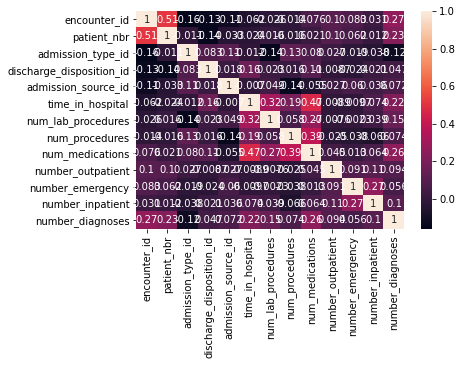

In [9]:
correlation1 = df1.corr()
sn.heatmap(correlation1, annot = True)

correlation values
patient number and encounter id - .51 correlation, not useful, only tells us that patient numbers and encounters were generated side by side frequently

number of medications and time in hospital - .47, makes sense, longer hospital stay would result in more medication 

num_medications and number of procedures - .39, same logic



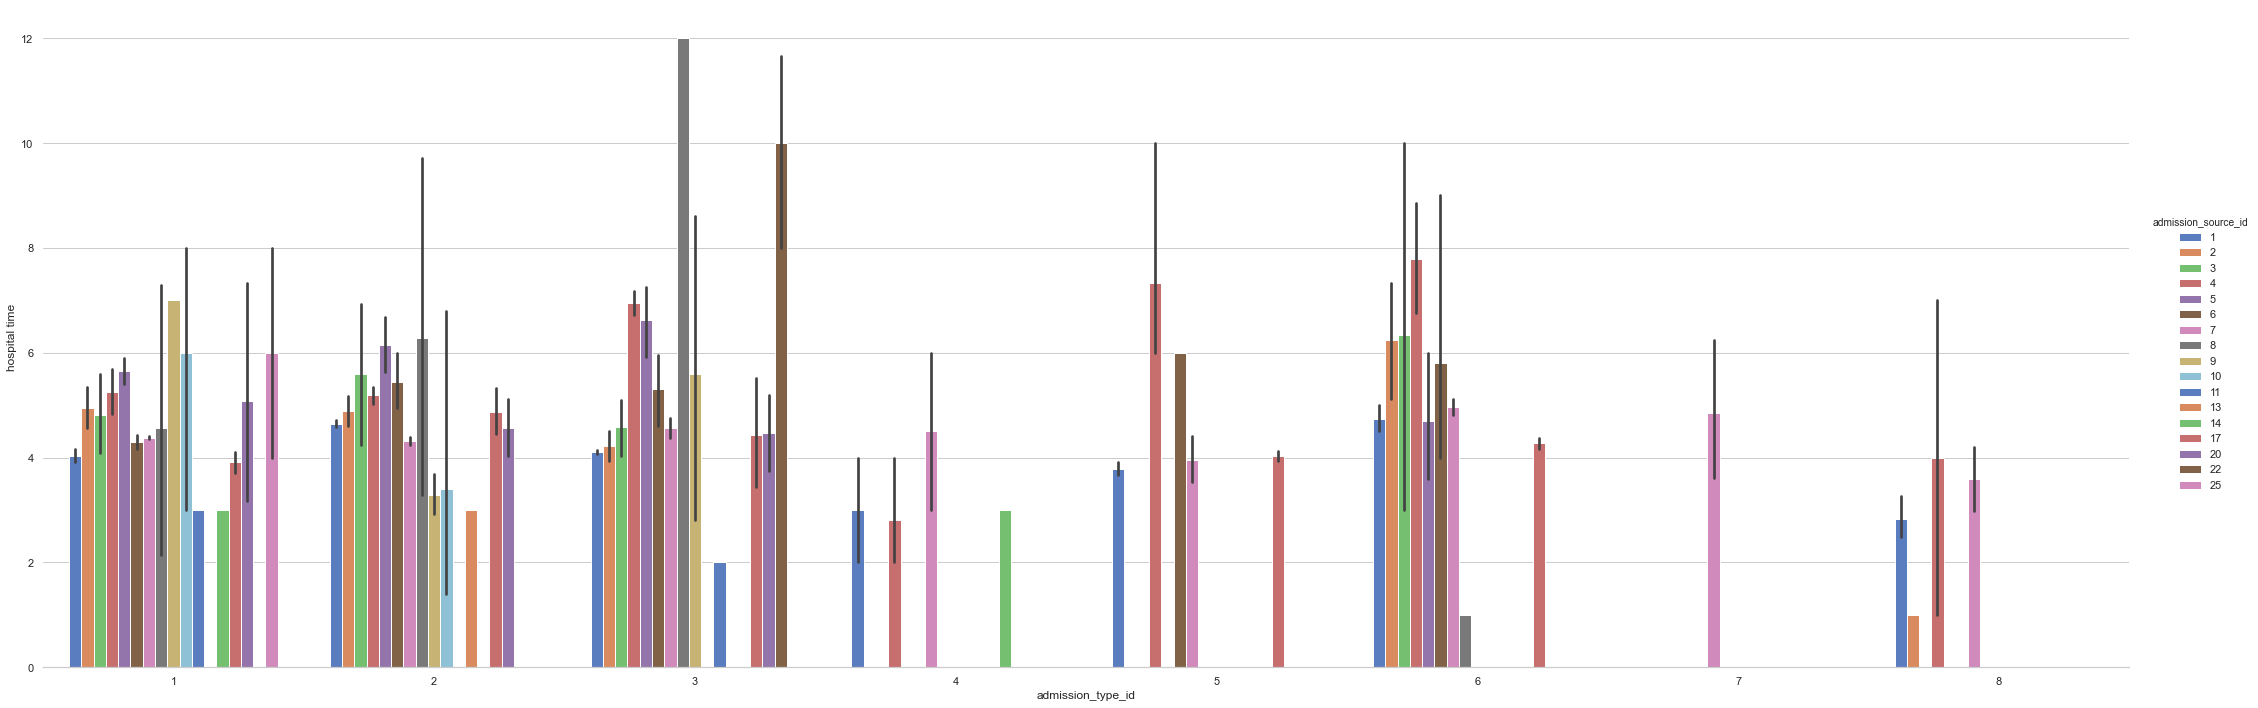

In [24]:
sns.set(style="whitegrid")

v1 = sns.catplot(x="admission_type_id", y="time_in_hospital", hue="admission_source_id", data=df1,
                height=10, aspect = 3, kind="bar", palette="muted")
v1.despine(left=True)
v1.set_ylabels("hospital time")


Admission type 1 = Emergency admission has the most datapoints, wide variety of admission sources, largest admission category is "not available", with a hospital stay of 7 days (no whisker? indicating no stays in the category over 7 days?), perhaps indicating a wide variety of miscellaneous sources that dont fall into other categories. Patients with emergency admission from a CAH(critical admission hospital) and from a hospice have outliers that are the longest stays. 

Admission type 2 = Urgent's largest category of admissions is from court/law enforcement, but not by much. 

Admission type 3 = Elective type hospital admissions had a larger plurality sourced from courts/law enforcement, followed by SNF transfers (skilled nursing facility).

Admission type 4 = Newborn, understandably far fewer sources for newborns, only from sources 1, 4, 7, 14; physician, hospital transfer, ER, and extramural birth, respectively. Average stays for this admission type are noticably lower than other admission types. 

Admission type 5 = Not available, difficult to draw conclusions here, only used for sources 1, 4, 6, 7, 17; physician recommendation, hospital transfer, from another healthcare facility, ER, from another home health agency\

Admission type 6 = NULL, ???

Admission type 7 = Trauma Center, exclusively transfers from ER, average stay of 5 days. 

Admission type 8 = Not mapped, ??? 

<Figure size 1152x504 with 0 Axes>

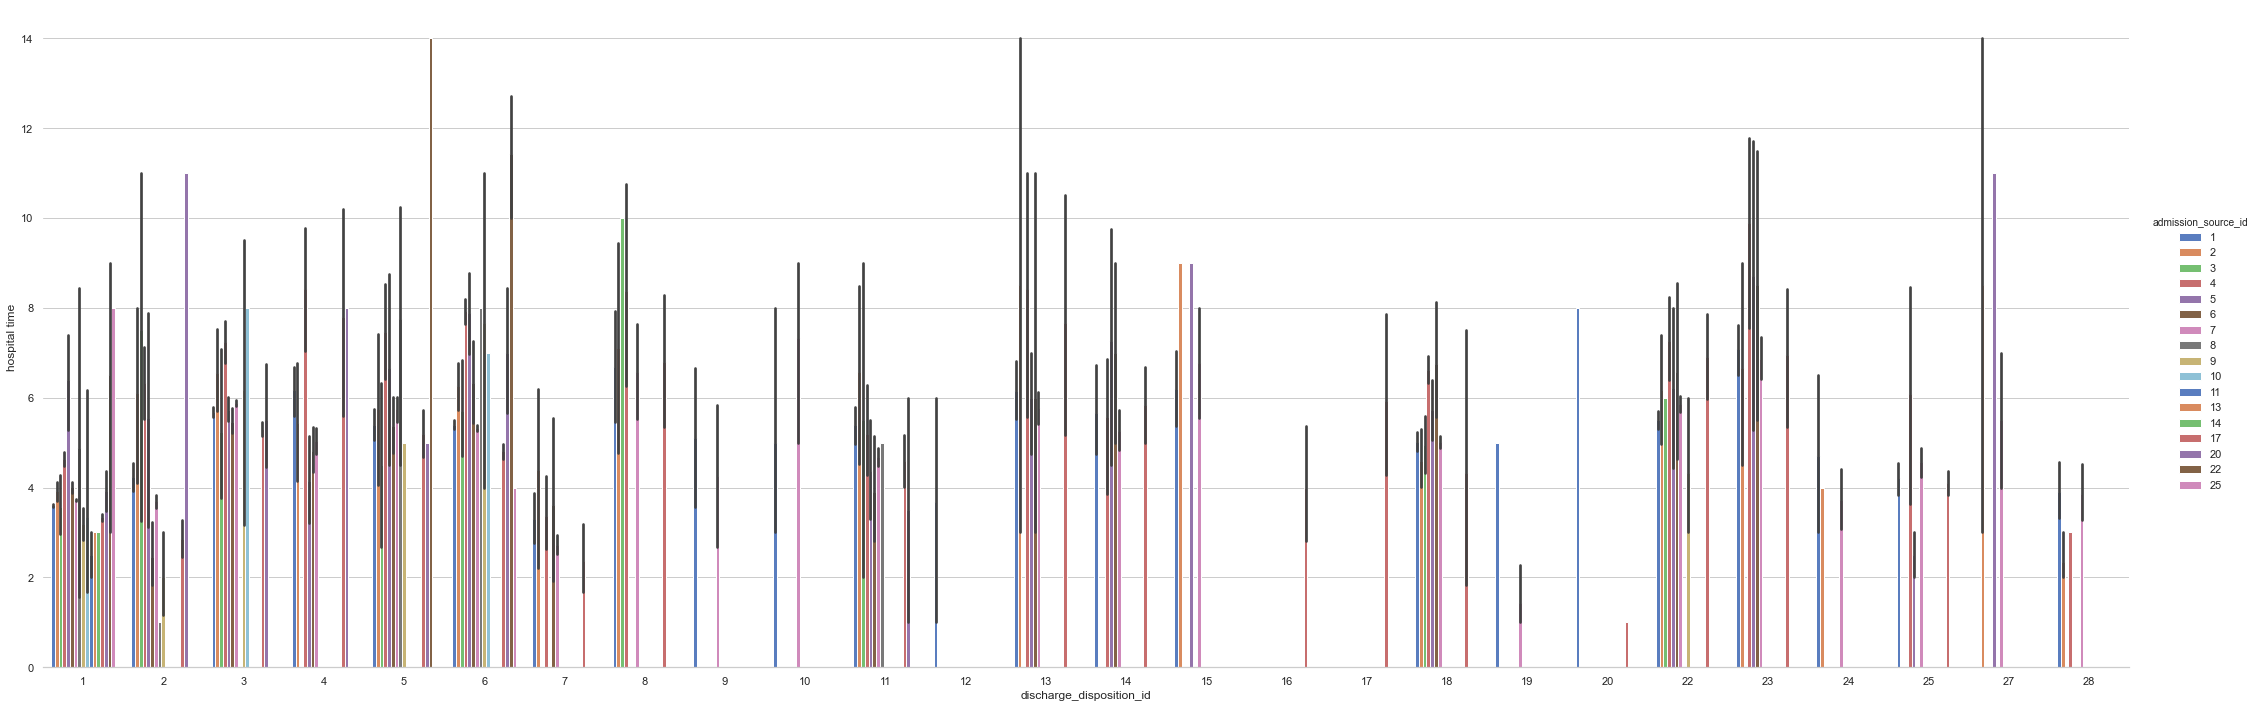

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize = (16, 7)) 
v2 = sns.catplot(x="discharge_disposition_id", y="time_in_hospital", hue="admission_source_id", data=df1,
                height=10, aspect = 3, kind="bar", palette="muted")
v2.despine(left=True)
v2.set_ylabels("hospital time")

(this might be too much data to easily analyze, maybe split by discharge disposition?)

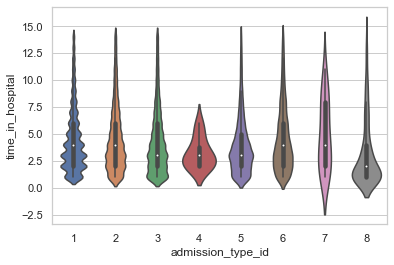

In [26]:
 
sns.violinplot(x="admission_type_id",y="time_in_hospital",data=d1)

most skew around 2.5 days? admission type 7, trauma center, somehow has negative hospital stay duration???

In [29]:
df1.columns.values

array(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype=object)

Wall time: 400 ms


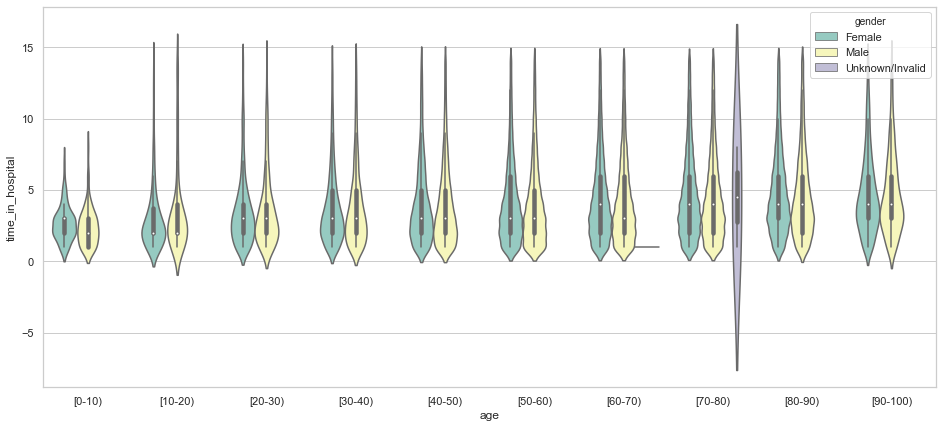

In [51]:
%%time
plt.figure(figsize = (16, 7)) 
sns.violinplot(x="age",y="time_in_hospital",hue='gender',data=d1, palette="Set3")

surprisingly little variation here, other than some probably extraneous data in th 70-80 group. All groups average/median between 5-10 days hospital stays, lowest times for 10-20, highest for 70+. Largest gender disparity is for ages 0-10 and 60-70, where it appears females have longer hospital stays than males

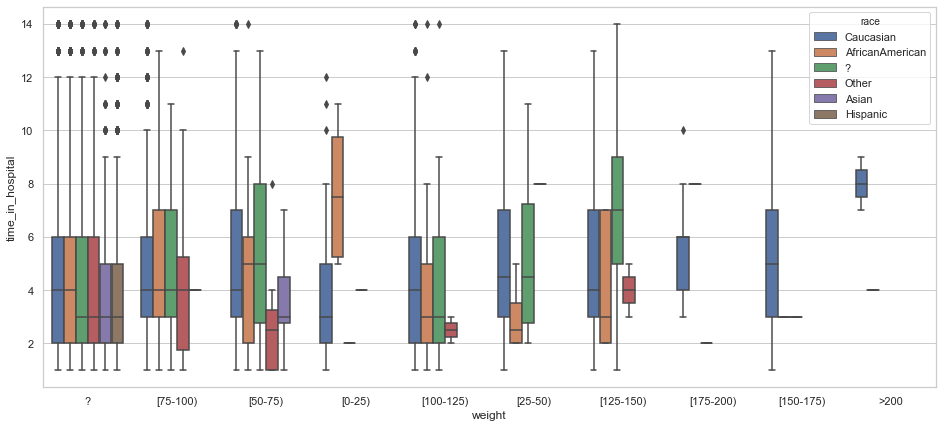

In [50]:
plt.figure(figsize = (16, 7))           
v4 =sns.boxplot(x = "weight", y = "time_in_hospital", hue = 'race', data = d1)

A fair amount of unknown weights and races, something to address in data cleaning. Unsure if lack of ethnic representation at higher weights reflects actual demographic makeup of local population, or if data for other races in that weight class are missing. 

## Business Understanding
[10 points] Describe the purpose of the data set you selected (i.e., why was this data collected in the ﬁrst place?). How will you measure the effectiveness of a good 
algorithm? Why does your chosen validation method make sense for this speciﬁc dataset and the stakeholders needs? 



## Data Understanding
[10 points] Describe the meaning and type of data (scale, values, etc.) for each attribute in the data ﬁle. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems? 

[10 points] Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.  

## Modeling and Evaluation
Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results.

## Cluster Analysis / Association Rule Mining / Collaborative Filtering

## Deployment
Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?

• How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? 

• How would your deploy your model for interested parties?  

• What other data should be collected? 

• How often would the model need to be updated, etc.? 

## Exceptional Work